TensorFlowをinstallする

In [4]:
! pip install tensorflow

TensorFlowをimportする

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers

教師データとテストデータを用意する

In [6]:
x_train = x_test = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_train = y_test = np.array([0, 1, 1, 0])

modelの作成
- 活性化関数はReLU関数
- layers.Denseは全結合層（次の層にある全てのneuronと結合する層）の意味

In [7]:
model = keras.models.Sequential()

# 入力層
model.add(layers.Dense(8, activation="relu", input_dim = 2))

# 全結合層
model.add(layers.Dense(8, activation="relu"))

# 出力層（確率への変換にsigmoidまたはsoftmaxを使用）
model.add(layers.Dense(2, activation="softmax"))

c:\Users\training4\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Toral paramsは各ニューロンとその間の線の数の合計
$$
2 \times 8 + 8 + 8 \times 8 + 8 + 8 \times 2 + 2 = 114
$$

In [8]:
# modelの情報を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

学習
- 最適化アルゴリズム(optimiser)にはadam：近年ではほぼデファクトスタンダード
- 損失関数はsparse_categorical_crossentropyで指定：解答のクラスがまばらなときに使用
- 評価関数はaccuracy

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.7457 - val_accuracy: 0.7500 - val_loss: 0.7446
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.7500 - loss: 0.7446 - val_accuracy: 0.7500 - val_loss: 0.7435
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7500 - loss: 0.7435 - val_accuracy: 0.7500 - val_loss: 0.7424
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7500 - loss: 0.7424 - val_accuracy: 0.7500 - val_loss: 0.7413
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7500 - loss: 0.7413 - val_accuracy: 0.7500 - val_loss: 0.7402
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7500 - loss: 0.7402 - val_accuracy: 0.7500 - val_loss: 0.7392
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7500 - loss: 0.7392 - val_accuracy: 0.7500 - val_loss: 0.7382
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7500 - loss: 0.7382 - val_accuracy: 0.5000 - val_

テスト

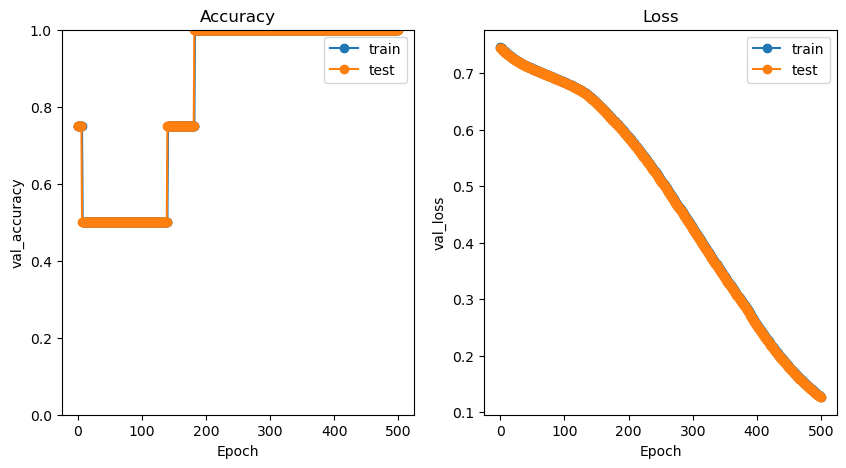

In [10]:
param =[["Accuracy", "accuracy", "val_accuracy"],["Loss", "loss", "val_loss"]]

plt.figure(figsize=(10, 5))
for i in range(2):
  plt.subplot(1, 2, i + 1)
  plt.title(f"{param[i][0]}")
  plt.xlabel("Epoch")
  plt.ylabel(param[i][2])
  plt.plot(history.history[param[i][1]], "o-")
  plt.plot(history.history[param[i][2]], "o-")
  plt.legend(["train", "test"])
  if i == 0:
    plt.ylim([0, 1])
plt.show()